Please scan this QR code if you want to provide some feedback to this module and your learning experiance as a MSc student. ⭐


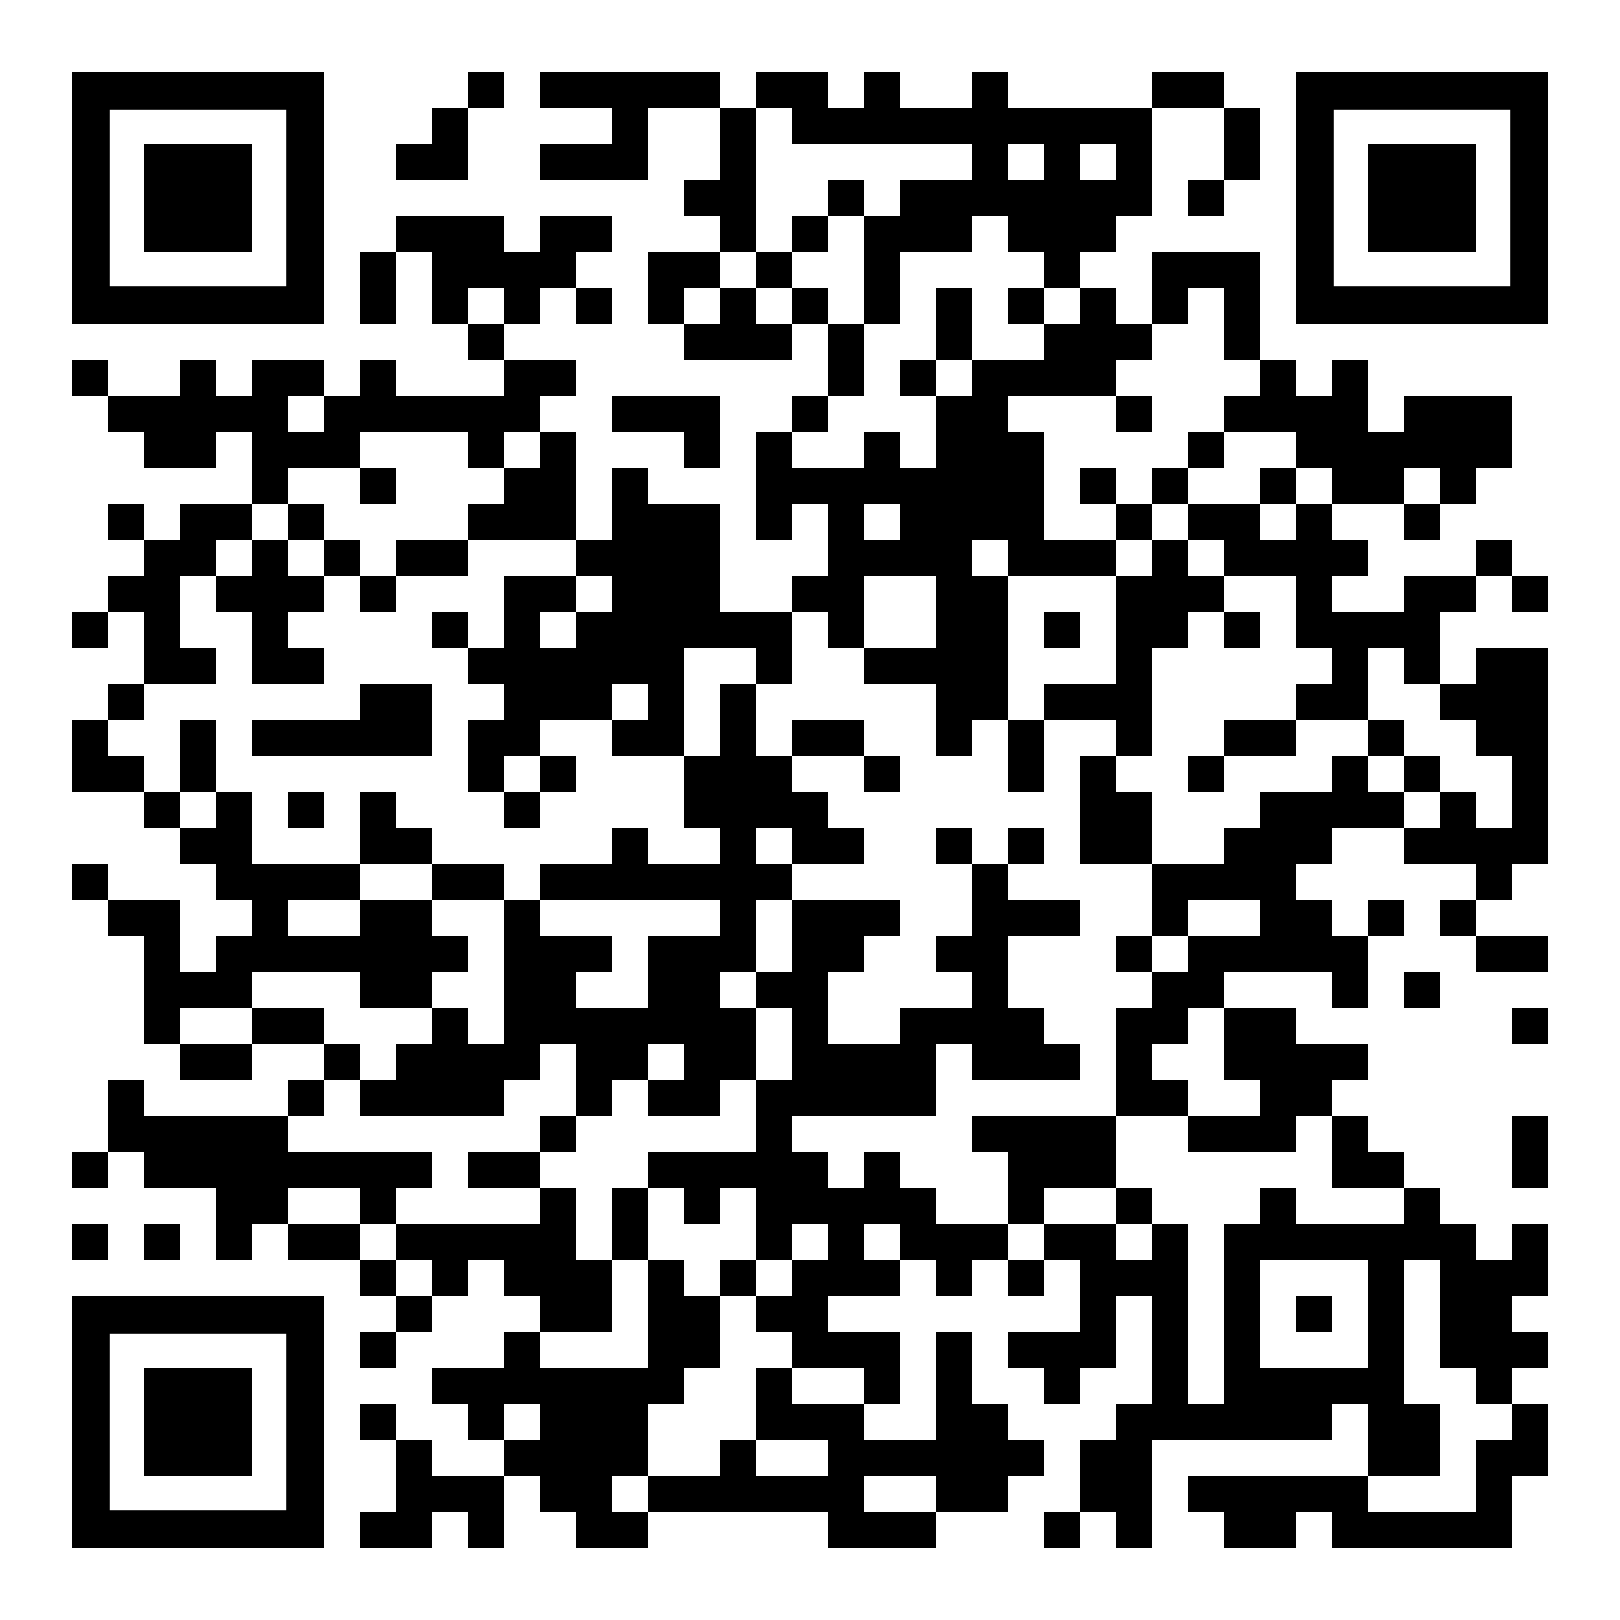

In [1]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if not hold:
        plt.grid()
        plt.show()
    return extent

def getExamples(n=100,d=2):
    """
    Generates n d-dimensional normally distributed examples of each class
    The mean of the positive class is [1] and for the negative class it is [-1]
    """
    Xp = randn(n,d)#+1   #generate n examples of the positie class
    Xp=Xp+1
    Xn1 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn1=Xn1-1
    Xn2 = randn(int(n/2),d)#-1   #generate n examples of the negative class
    Xn2=Xn2+2
    Xn = np.vstack((Xn1,Xn2))  #Stack the examples together to a single matrix
    X = np.vstack((Xp,Xn))  #Stack the examples together to a single matrix
    Y = np.array([+1]*n+[-1]*n) #Associate Labels
    return (X,Y)

from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score

# ROC (receiver operating characteristic) curve
def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

# precision-recall curve
def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc




In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X,y = getExamples(n=100)
Xtr, Xv, ytr, yv = train_test_split(X, y, test_size=0.2, shuffle = True, stratify = None)#, random_state=42)

clf = SVC(C=10.0, kernel='rbf',gamma = 1.0) #degree, coef0, gamma='scale',, class_weight=None
clf.fit(Xtr,ytr)
zv = clf.decision_function(Xv)
# calculate the number of true poisitives and false positives at a threshold of t
t = 0
pred = 2*(zv>t)-1
print('Accuracy',np.mean(pred==yv))

tpr = np.sum((pred==1)*(yv==1))/np.sum(yv==1)
fpr = np.mean((pred==1)*(yv==-1))
precision = np.sum((pred==1)*(yv==1))/np.sum(pred==1)
print('TPR:',tpr,'FPR:',fpr)
print('Precision:',precision)

Accuracy 0.725
TPR: 0.6470588235294118 FPR: 0.125
Precision: 0.6875


Question: 

What is True positives and false positives ?  What is the trade-off between them ?

What is ROC curve ? How to interpret it ? 

What is recall and precision ? and trade-off between them ?

In which case recall or precision is more important ? can you give me some examples ?




/var/folders/jw/klzt0zl51rv1qf8ldhmfmbqc0000gn/T/ipykernel_82535/4122191327.py:58: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


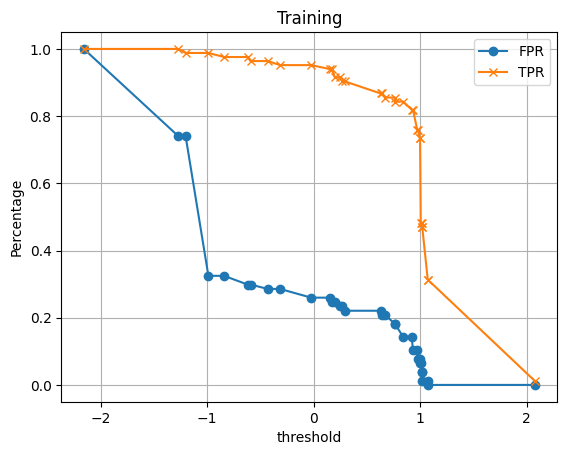

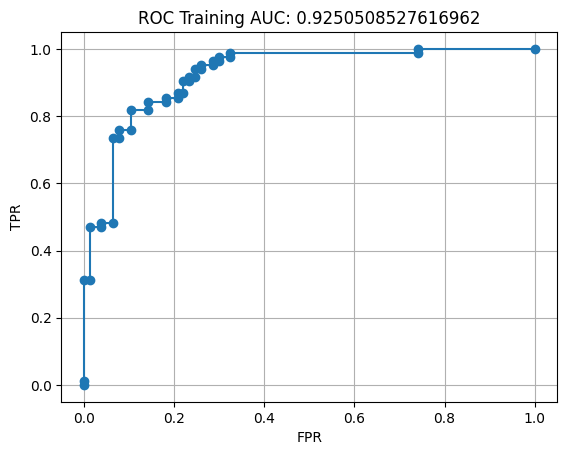

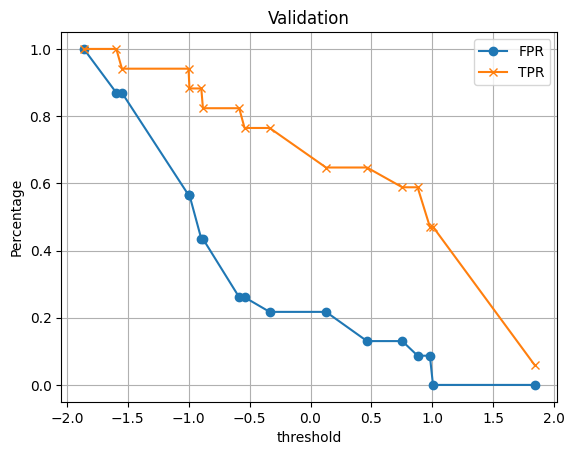

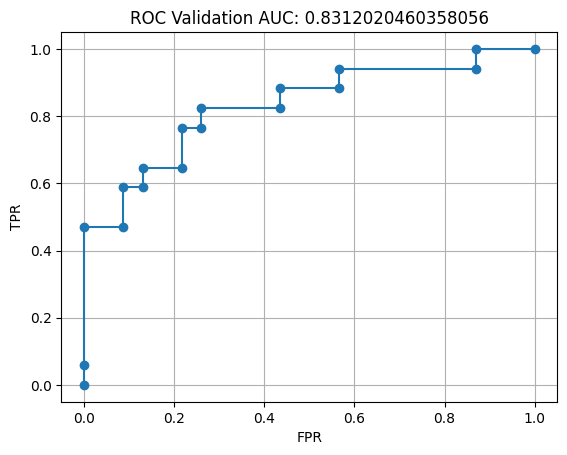

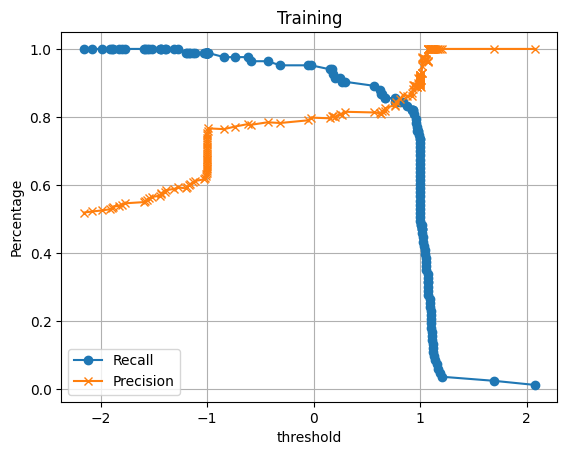

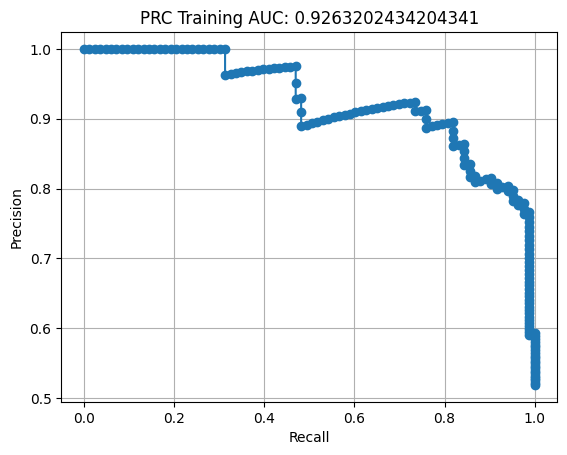

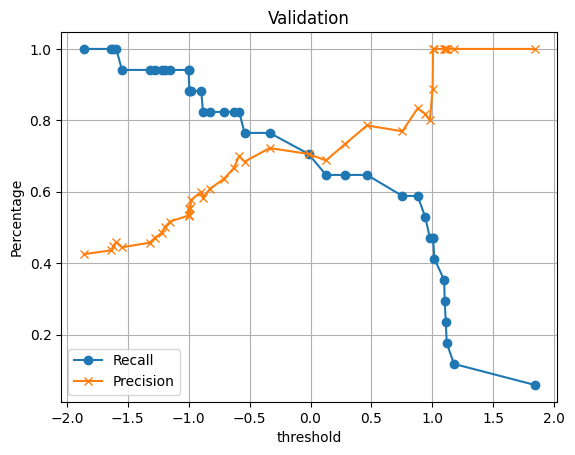

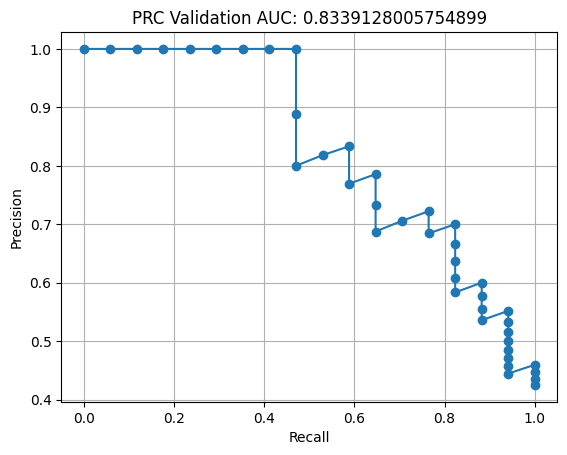

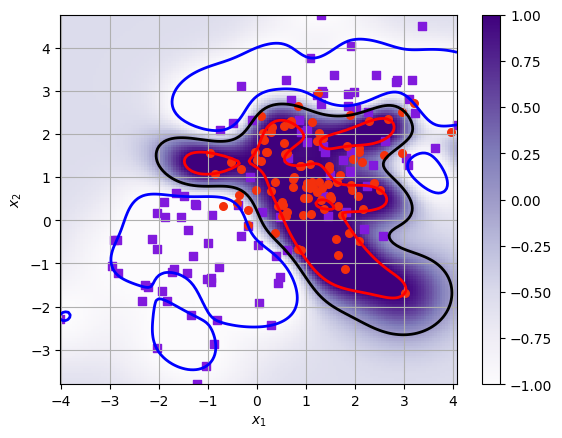

Training AUC ROC: 0.9250508527616962
Validation AUC ROC: 0.8312020460358056


In [6]:
# plot fpr and tpr vs. thrshold and roc
roc_tr = plotROC(ytr,clf.decision_function(Xtr),'Training')
roc_v = plotROC(yv,zv,'Validation')
pr_tr = plotPRC(ytr,clf.decision_function(Xtr),'Training')
pr_v = plotPRC(yv,zv,'Validation')


plt.figure()
plotit(X = X, Y = y, clf = clf.decision_function, conts =[-1,0,1], colors = 'random')

print('Training AUC ROC:', roc_tr)
print('Validation AUC ROC:', roc_v)

Question: what is StratifiedKFold ? Different to K-fold cross validation ? When to use this ? 
Try generate an imbalanced dataset and compared the result between StratifiedKFold and K-fold cross validation

Fold  0 AUC ROC: 0.7174999999999999
Fold  1 AUC ROC: 0.7300000000000001
Fold  2 AUC ROC: 0.64
Fold  3 AUC ROC: 0.7075
Fold  4 AUC ROC: 0.8
Fold-Wise AUC [0.7174999999999999, 0.7300000000000001, 0.64, 0.7075, 0.8]
Mean AUC 0.719
Stdev AUC 0.051102837494604945


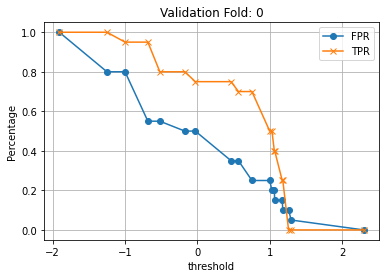

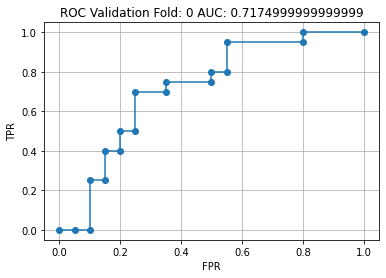

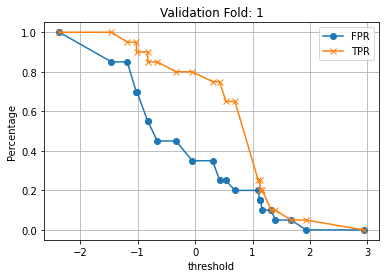

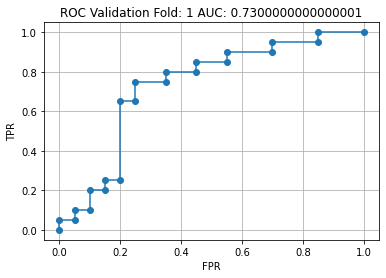

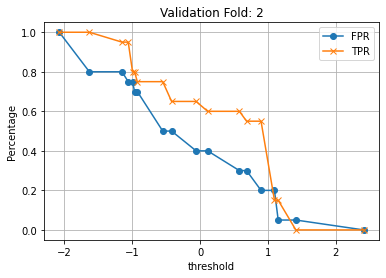

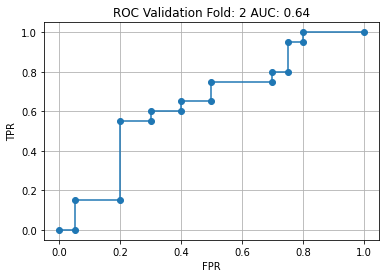

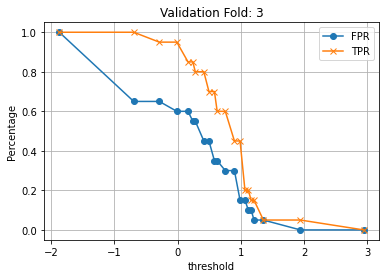

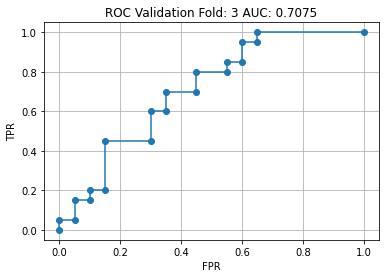

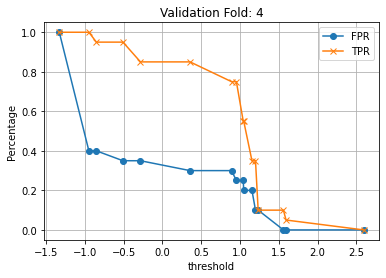

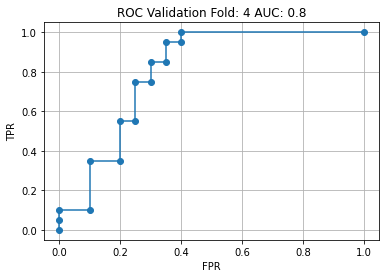

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
for i,(tr_idx, v_idx) in enumerate(skf.split(X, y)):
  Xtr, Xv = X[tr_idx], X[v_idx]
  ytr, yv = y[tr_idx], y[v_idx]
  clf = SVC(C=10.0, kernel='rbf',gamma = 1.0) #degree, coef0, gamma='scale',, class_weight=None
  clf.fit(Xtr,ytr)
  z = clf.decision_function(Xv)
  roc_auc = plotROC(yv,z,pstr = 'Validation Fold: '+str(i))
  A.append(roc_auc)
  print('Fold ',i,'AUC ROC:',roc_auc)

print('Fold-Wise AUC',A)
print('Mean AUC',np.mean(A))
print('Stdev AUC',np.std(A))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: The following kwargs were not used by contour: 'label'


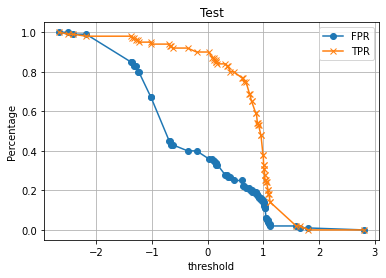

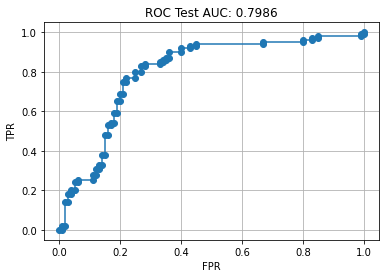

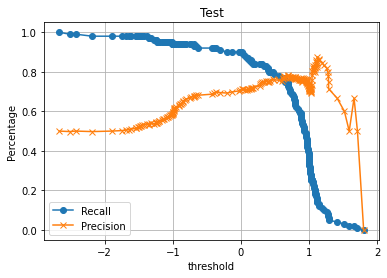

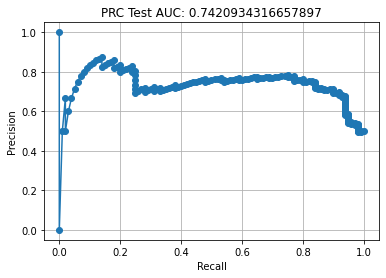

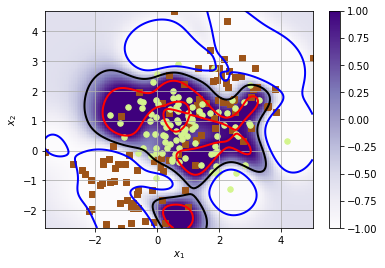

Test AUC ROC: 0.7986


In [ ]:
#Final model training on all data prior to "deployment"
clf = SVC(C=10.0, kernel='rbf',gamma = 1.0).fit(X,y)
#testing
Xtt,ytt = getExamples(n=100)
roc_tt = plotROC(ytt,clf.decision_function(Xtt),'Test')
pr_tt = plotPRC(ytt,clf.decision_function(Xtt),'Test')
plt.figure()
plotit(X = Xtt, Y = ytt, clf = clf.decision_function, conts =[-1,0,1], colors = 'random')

print('Test AUC ROC:', roc_tt)

## Questions:
0. What is the objective of validation?
1. What is stratified validation?
2. What are underlying assumptions for accuracy as a metric?

### Metric
3. What is precision, recall, false positive rate?
4. Why are accuracy, precision, recall etc. dependent upon the threshold of the classifier?
5. How do precision, recall and false positive rate change as the threshold of the classifier is increased?

### ROC Curve
6. What is the ROC curve?
7. How does area under the ROC curve serve as a performance metric?
8. Why is the ROC curve called the ROC curve?
9. How does the performance estimate of your model change with increase in the size of your validation set?
10. What are the limitations of ROC curves?
11. What is the most important region of an ROC curve?

### Precision recall curve
12. How is a precision recall curve useful?
13. What is the relationship between the ROC and Precision-Recall curves?
14. What are the limitations of the precision recall curve?

### Deployment
15. How do we train the final model for deployment?
16. How can you chose an "operating point" for a machine learning model?
